In [1]:
# Importing helpful package to load and hadle our data
import pandas as pd
import numpy as np
import math 

# import package for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# flexible and easy-to-use missing data visualizations
import missingno as msno

# Configure visualisations
# Below magic function make our plot outputs appear and be stored within the notebook. 
%matplotlib inline

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


In [2]:
#  Get data
diamond_data = pd.read_csv('diamonds.csv')
# Get glimpse of data
diamond_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Detail about each features:
1. price price in US dollars (\$326--\$18,823)
2. carat weight of the diamond (0.2--5.01)
3. cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. color diamond colour, from J (worst) to D (best)
5. clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. x length in mm (0--10.74)
7. y width in mm (0--58.9)
8. z depth in mm (0--31.8)
9. depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. table width of top of diamond relative to widest point (43--95)

In [3]:
# Getting unwanted column "Unnamed: 0". So removing this from our data set.
# To delete the column without having to reassign diamond_data:
diamond_data.drop('Unnamed: 0', axis=1, inplace=True)
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Here we have mix of 'Quantitative' and 'Categorical (also called qualitative)' features.
1. Quantitative  : carat, depth, table,price, x,y and z
2. Categorical :  cut, color and clarity

In [4]:
# get info about dataset
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Inference from above info. 
1. We have 0 null data
2. Total No. of rows: 53940 
3. Total No. of columns : 10

In [5]:
# Confirm 0 null data
diamond_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

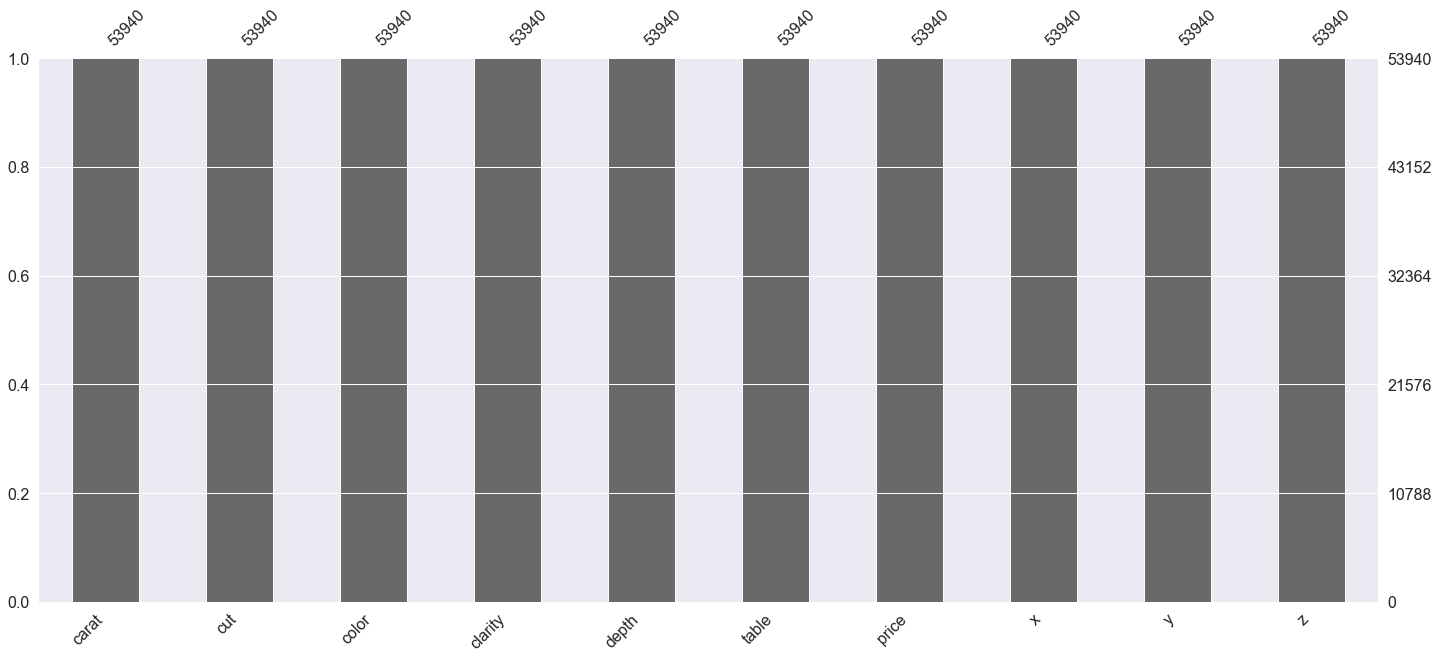

In [6]:
# Visualize missing data 
msno.bar(diamond_data)
plt.show()

# Hence no null value, now we can do data visualization

In [7]:
# diamond_data.describe(include='all')
diamond_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


x,y and z are parameter that represent dimension of diamond. Dimension can never be zero. We need to clear this data

In [8]:
diamond_data.loc[(diamond_data.x == 0) | (diamond_data.y == 0) |( diamond_data.z == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [9]:
def check_for_zero_dimension():
    print("Rows and Column of dataset : {}".format(diamond_data.shape))
    print("No. of rows with x == 0 : {}".format((diamond_data['x'] == 0).sum()))
    print("No. of rows with y == 0 : {}".format((diamond_data['y'] == 0).sum()))
    print("No. of rows with z == 0 : {}".format((diamond_data['z'] == 0).sum()))
    print("Total no.of row with either of x, y or z == 0 : {}".format(len(diamond_data.loc[(diamond_data.x == 0) | (diamond_data.y == 0) |( diamond_data.z == 0)])))

In [10]:
check_for_zero_dimension()

Rows and Column of dataset : (53940, 10)
No. of rows with x == 0 : 8
No. of rows with y == 0 : 7
No. of rows with z == 0 : 20
Total no.of row with either of x, y or z == 0 : 20


In [11]:
# As we have 53940 rows and out of which only 20 rows are with 0 dimension, so we can directly remove them from our dataset
diamond_data = diamond_data[(diamond_data[['x','y','z']] != 0).all(axis=1)]

In [13]:
# Again confirm row with zero dimension
check_for_zero_dimension()

Rows and Column of dataset : (53920, 10)
No. of rows with x == 0 : 0
No. of rows with y == 0 : 0
No. of rows with z == 0 : 0
Total no.of row with either of x, y or z == 0 : 0


Now we will consider "Price" as our output and rest other features as input

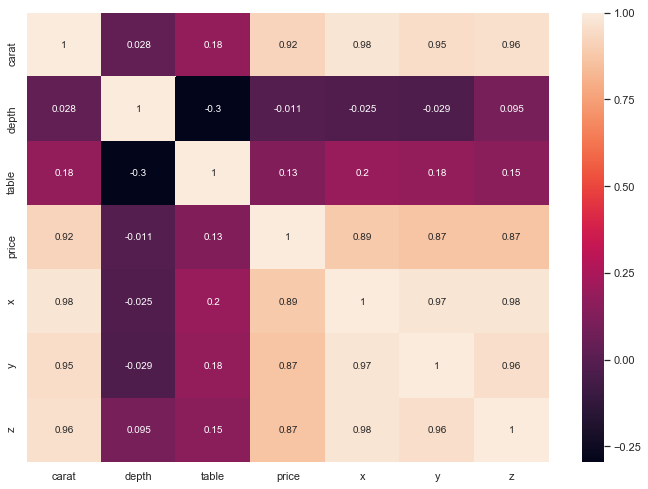

In [14]:
# Correlation between all features
# Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe.
# Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored. 
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(diamond_data.corr(),annot=True,ax=ax)
plt.show()

Conclusion:
1. carat has positive and high correlation with all features.
2. table has least correlation with all other features
3. Price has maximum correlation with 'carat' and then with dimension.
4. depth has neagtive correlation with all other features.

# Visualize each feature and its relation with Price

1. carat

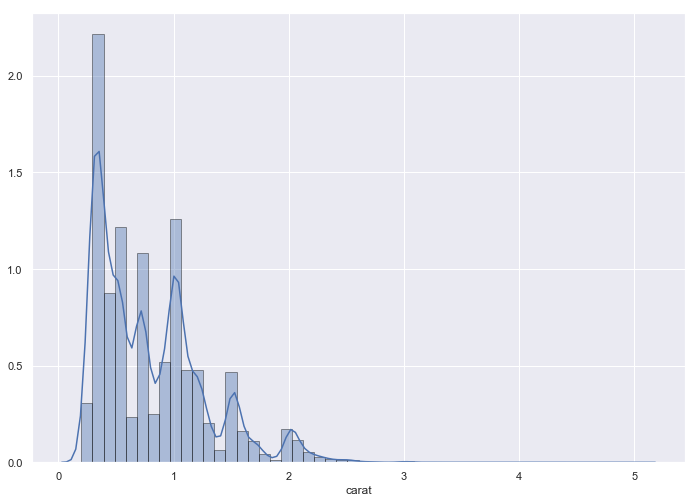

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(diamond_data['carat'],ax=ax,hist_kws={'edgecolor':'black'})
plt.show()

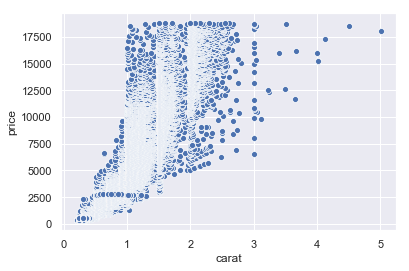

In [16]:
sns.scatterplot(x='carat' , y='price' , data=diamond_data)
plt.show()
# Show positive relation between carat and price

2. cut

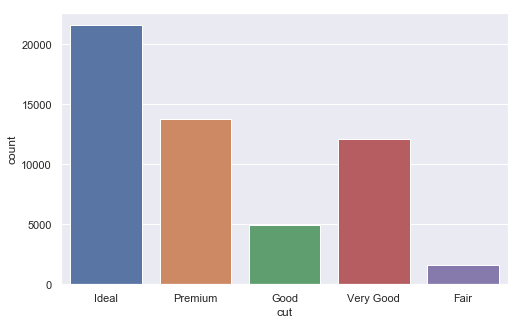

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
sns.countplot(x='cut',data=diamond_data,ax=ax)
plt.show()

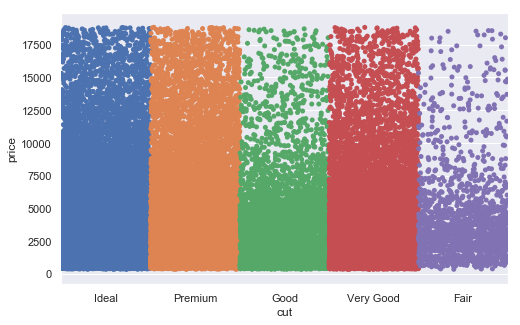

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.stripplot(x='cut',y='price',data=diamond_data,jitter=0.5,ax=ax)
# sns.stripplot(x='cut',y='price',data=diamond_data,jitter=False,ax=ax)
plt.show()
# jitter to bring out the distribution of values
# jitter option, a small amount of random noise is added to the vertical coordinate
# Jitter is a random value (or for our purposes pseudo-random) that is assigned to the dots to separate
# them so that they aren't plotted directly on top of each other

# cut have postive corellation with price.

3. color

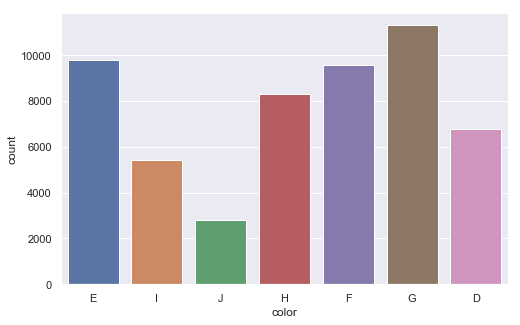

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
sns.countplot(x='color',data=diamond_data,ax=ax)
plt.show()

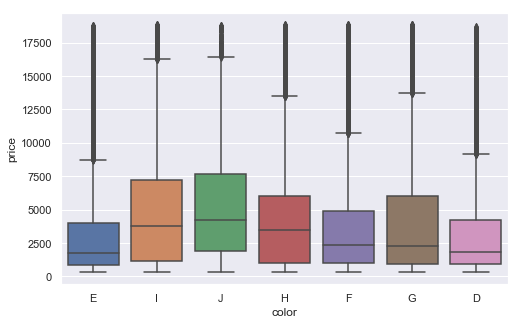

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
sns.boxplot(x='color',y='price', data=diamond_data,ax=ax)
# sns.swarmplot(x="color", y="price", data=diamond_data, color=".25", ax=ax)
plt.show()
# color H has normal distibution and rest are postive skewed

4. Clarity

In [2]:
labels = diamond_data.clarity.unique().tolist()
sizes = diamond_data.clarity.value_counts().tolist()
explode = (0.1, 0, 0, 0, 0, 0, 0,0)
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

NameError: name 'diamond_data' is not defined

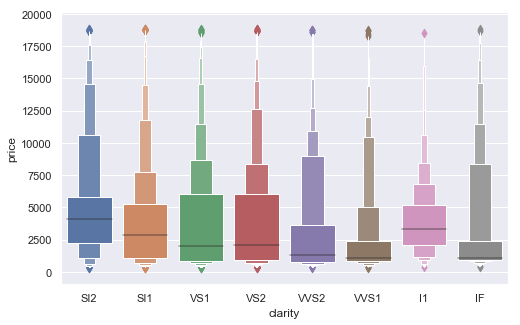

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
sns.boxenplot(x='clarity',y='price', data=diamond_data,ax=ax)
# sns.swarmplot(x="color", y="price", data=diamond_data, color=".25", ax=ax)
plt.show()
# clarity s11 and s12 have normal distibution and vs1 and vs2 have almost same distribution

5. depth

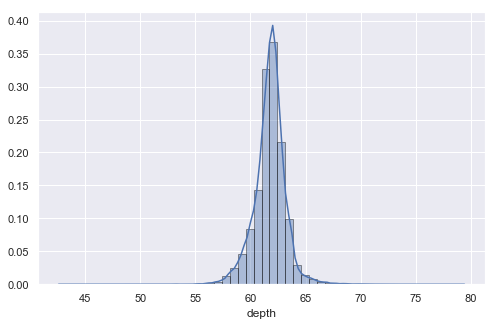

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
sns.distplot(diamond_data['depth'],ax=ax,hist_kws={'edgecolor':'black'})
plt.show()

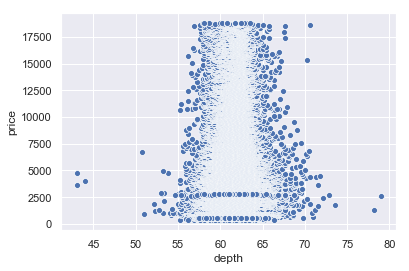

In [24]:
sns.scatterplot(x='depth' , y='price' , data=diamond_data)
plt.show()
# We can infer that depth between 55-70 have highest price, more depth low price so some what negative correlation

6. Table

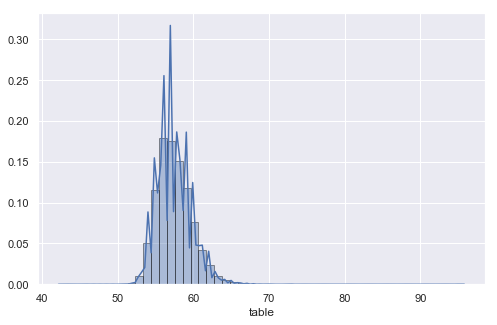

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
sns.distplot(diamond_data['table'],ax=ax,hist_kws={'edgecolor':'black'})
plt.show()

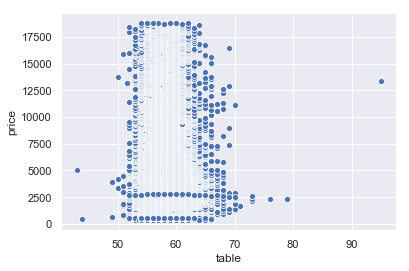

In [26]:
sns.scatterplot(x='table' , y='price' , data=diamond_data)
plt.show()

#  most of the high price for table range from 55-70 

7. Dimensions(x,y,z)

(2, 10)

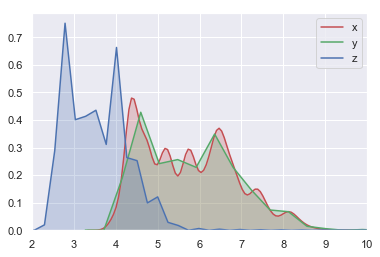

In [27]:
sns.kdeplot(diamond_data['x'] ,shade=True , color='r' )
sns.kdeplot(diamond_data['y'] , shade=True , color='g' )
sns.kdeplot(diamond_data['z'] , shade= True , color='b')
plt.xlim(2,10)

# one-hot encoding on categorical data.

In [28]:
one_hot_encoders_diamond_data =  pd.get_dummies(diamond_data)
cols = one_hot_encoders_diamond_data.columns
diamond_clean_data = pd.DataFrame(one_hot_encoders_diamond_data,columns= cols)
diamond_clean_data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


Scaling

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1

In [31]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(diamond_clean_data[['carat','depth','x','y','z','table']]),
                           columns=['carat','depth','x','y','z','table'],
                           index=diamond_clean_data.index)

In [32]:
numericals.head()

,carat,depth,x,y,z,table
0,-1.198204,-0.174203,-1.591573,-1.539219,-1.580084,-1.099725
1,-1.240417,-1.361090,-1.645173,-1.662014,-1.750896,1.585988
2,-1.198204,-3.385781,-1.502241,-1.460280,-1.750896,3.376463
3,-1.071566,0.454149,-1.368242,-1.319943,-1.295396,0.243131
4,-1.029353,1.082501,-1.243176,-1.214690,-1.124583,0.243131


In [40]:
# When deep=True (default), a new object will be created with a copy of the calling object’s data and indices.
# Modifications to the data or indices of the copy will not be reflected in the original object
diamond_clean_data_standard = diamond_clean_data.copy(deep=True)
diamond_clean_data_standard[['carat','depth','x','y','z','table']] = numericals[['carat','depth','x','y','z','table']]

In [34]:
diamond_clean_data_standard.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198204,-0.174203,-1.099725,326,-1.591573,-1.539219,-1.580084,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,-1.240417,-1.361090,1.585988,326,-1.645173,-1.662014,-1.750896,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.198204,-3.385781,3.376463,327,-1.502241,-1.460280,-1.750896,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.071566,0.454149,0.243131,334,-1.368242,-1.319943,-1.295396,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-1.029353,1.082501,0.243131,335,-1.243176,-1.214690,-1.124583,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [35]:
x = diamond_clean_data_standard.drop(["price"],axis=1)
y = diamond_clean_data_standard.price

In [36]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

## Model Training

In [37]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


regr = linear_model.LinearRegression(normalize=True)
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)

In [39]:
from sklearn.metrics import mean_absolute_error
print("accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
print("R2 score: {}".format(r2_score(test_y, y_pred)))
print('Coefficients: \n', regr.coef_)

accuracy: 92.20915263315173%
Mean absolute error: 731.6019411473789
Mean squared error: 1222457.3868076163
R2 score: 0.9220915263315173
Coefficients: 
 [ 5.39683506e+03 -8.26615440e+01 -5.25334937e+01 -1.18716778e+03
  1.06526010e+01 -5.41499264e+01  1.51259408e+16  1.51259408e+16
  1.51259408e+16  1.51259408e+16  1.51259408e+16 -2.85304095e+15
 -2.85304095e+15 -2.85304095e+15 -2.85304095e+15 -2.85304095e+15
 -2.85304095e+15 -2.85304095e+15 -3.13985341e+15 -3.13985341e+15
 -3.13985341e+15 -3.13985341e+15 -3.13985341e+15 -3.13985341e+15
 -3.13985341e+15 -3.13985341e+15]
